In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [2]:
# Load data file
bank=pd.read_csv('data1.csv')
# Make a copy for parsing
question_data = bank.copy()
question_data['C'] = question_data['C'].map( {'Vata':0, 'Kapha':1,'Pitta':2} )
# Convert categorical variables to dummies
question_data_original=question_data
question_data_class=question_data['C']
question_data.drop('C', axis=1, inplace=True)
question_with_dummies = pd.get_dummies(data=question_data)

from sklearn.cross_validation import train_test_split
X=question_with_dummies
y=question_data_class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# standardizing and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
P_scaled=scaler.fit_transform(question_with_dummies)
P_scaled=pd.DataFrame(P_scaled)
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(P_scaled)
P_pca=P_pca[:,0:2]
print(P_pca.shape)
arr1=y.ravel()
arr1=arr1.reshape(147,1)
print(arr1.shape)

(147, 2)
(147, 1)


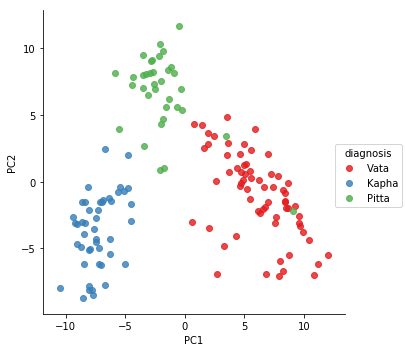

In [14]:
n=['PC1','PC2','diagnosis']
d=arr1  # diagnosis column
#merging the reduced data with diagnosis column
Xy=pd.DataFrame(np.hstack([P_pca,d]),columns=n)
# plotting the the first 2 pca components against diagnosis
#type(d)
g=sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False,markers=["o", "o","o"],palette="Set1")
# replace labels
new_labels = ['Vata','Kapha','Pitta']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()
g.savefig('pca.png',dpi=200)